In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cuando pensamos en analizar datos muchas veces nos encontramos con la necesidad de caracterizar lo que esta 
# ocurriendo con la informacion, vemos como generar nuevas variables que contengan informacion casi podriamos decir
# de contexto. Es asi como el numero de dimensiones, o sea las variables o features que tenemos disponibles crecen 
# rapidamente. Imaginemos que queremos analizar el comportamiento de un motor electrico, necesitaremos datos como
# RPM, marca, caracteristicas tecnicas, consumo de electricidad, temperatura y asi podriamos seguir.

In [3]:
# El objetivo de PCA generalmente es reducir la cantidad de dimensiones disponibles del conjunto de datos
# Porque no siempre mas dimensiones es mejor, en estadistica existe algo llamado la maldicion de la dimension o
# efectos hughes (https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)
# Basicamente esta maldicion se traduce en que por cada dimension agregada nuestro requerimiento de datos crece
# exponencialmente para obtener el mismo nivel estadistico del resultado.

In [4]:
# Especificamente cuando hablamos de aprendizaje automatico esta maldicion representa un serio problema para 
# resolver los problemas de optimizacion involucrados. O para K-means o K-vecinos, la distancia a los vecinos
# mas proximos crece con cada aumento de dimension

In [5]:
# PCA se enfoca en reducir la cantidad de dimensiones por medio de analizar las dimensions que no estan
# completamente no correlacionadas. Lo que hace es darnos un nuevo conjunto de dimensiones, que es menor al 
# anterior pero que contiene una cantidad de informacion similar. Por ejemplo podriamos elegir quedarnos con
# todas las dimensiones que expliquen el 80% de la varianza, o el 90% por proponer 2 numeros.

In [6]:
# Veamos un ejemplo, Creamos un conjunto de 2 dimensiones y agreguemos correlaciones entre ambas dimensions
np.random.seed(123)
x = 5*np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)

x = x.reshape(100, 1)
y = y.reshape(100, 1)

X = np.hstack([x, y])
X.shape

(100, 2)

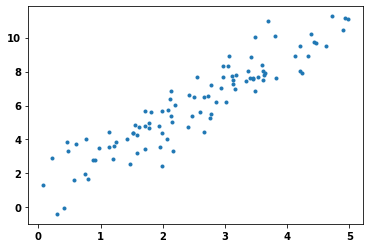

In [8]:
plt.plot(X[:,0], X[:,1], '.')
plt.show()

In [9]:
# Datos altamente correlacionados implican que las dimensiones son redundantes, o sea es posible predecir una
# variable a partir de las otras sin perder mucha informacion
# Lo primero que haremos es centrar los datos alrededor del 0

In [17]:
def centrarData(X):
    X = X.copy()
    X -= np.mean(X, axis = 0)
    return X

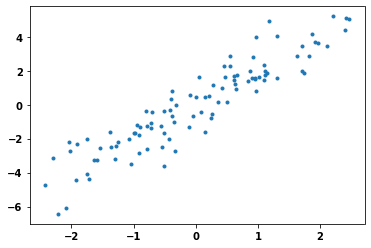

In [18]:
X_centrado = centrarData(X)
plt.plot(X_centrado[:,0], X_centrado[:,1], '.')
plt.show()

In [19]:
# Ahora podemos buscar las componentes principales, estas componentes corresponden a los valores que toma d
# para maximizar la funcion d* = arg max Tr(d.T X.T X d) con d.T d = 1
# Para encontrar d calculamos los autovectores y autovalores de X.T X

In [ ]:
# Por que pedimos que d.T d = 1
# Estamos pediendo que el vector solucion tenga norma 1, esto esta relacionado con el problema de maximizacion, sin
# esta limitacion d podria crecer hasta el infinito sin ningun sentido.

In [20]:
autovalores, autovectores = np.linalg.eig(X_centrado.T.dot(X_centrado))
print(autovectores)

[[-0.91116273 -0.41204669]
 [ 0.41204669 -0.91116273]]


In [21]:
# Estos son los vectores que maximizan nuestra funcion.Cada columna esta asociada con un autovalor. El vector 
# asociado con el autovalor mas grande nos dice la direccion asociada con la varianza mas grande en nuestra info

In [23]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

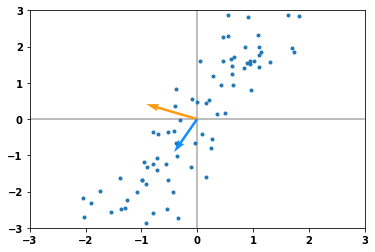

In [24]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors(autovectores.T, [orange, blue])
plt.plot(X_centrado[:,0], X_centrado[:,1], '.')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [25]:
# El vector azul indica la direccion de maxima varianza en nuestros datos. Si proyectaramos todos los puntos sobre
# ese eje y nos quedaramos solo con esa informacion obtendriamos la mayor cantidad posible.

In [26]:
print(autovalores)

[ 18.04730409 798.35242844]


In [27]:
# Efectivamente vemos que el segundo autovalor corresponde a la direccion del vector azul

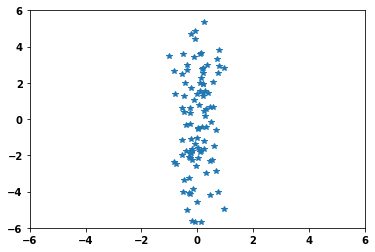

In [29]:
X_new = autovectores.T.dot(X_centrado.T)

plt.plot(autovectores.T.dot(X_centrado.T)[0, :], autovectores.T.dot(X_centrado.T)[1, :], '*')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()